# Identify the sentiments

## 01) import necessory libraries

In [5]:
# import necessory libraries
!pip install tensorflow_text
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
!pip install spacy nltk
!python -m spacy download en

2023-12-10 20:38:45.388071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 20:38:45.388122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 20:38:45.389577: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 20:38:46.443493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-10 20:38:47.894701: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the gui

## 02) imort train and test datasets

In [6]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
train  = pd.read_csv('/content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify the Sentiments/train_2kmZucJ.csv')
test = pd.read_csv('/content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify the Sentiments/test_oJQbWVk.csv')


In [7]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [8]:
"training shape=>",train.shape,"test shape=>",test.shape

('training shape=>', (7920, 3), 'test shape=>', (1953, 2))

In [9]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Load your dataset. Assuming your dataset is a CSV file named "train.csv":


# Separate your features and target variable:
X = train['tweet']
y = train['label']



ros = RandomOverSampler(random_state=0)

# Fit the sampler and create the resampled dataset:
X, y = ros.fit_resample(X.values.reshape(-1, 1), y)
# Convert X and y back to DataFrame
X_df = pd.DataFrame(X, columns=['tweet'])
y_df = pd.DataFrame(y, columns=['label'])

# Concatenate X_df and y_df to form the new DataFrame
train = pd.concat([y_df,X_df], axis=1)

# Now, you can use `X_resampled` and `y_resampled` to train your model.
train['label'].value_counts()
train

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...
...,...,...
11783,1,lost all my contacts again... please text me w...
11784,1,This is my 4th iPhone charger and it's already...
11785,1,"Oh, that silly Hitler.... #hateapple RT @DonSt..."
11786,1,just bought a Huawei Ascend G300 and it has my...


In [11]:
#combine dataset for preprocessing purpose
# combi = train.append(test, ignore_index=True)
# combi.size
#this step show some warnings cause of target not exist in test cases

## functions

regex patern removing functions

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

## preprocess dataset

In [13]:
############################################################## preprocessing pipeline #######################################################
#https://regex101.com/ - regex tool


## training preprocessing
train['re_preprocessed']=np.vectorize(remove_pattern)(train['tweet'], "@[\w]*")
#remove links from textes
train['re_preprocessed'] = train['re_preprocessed'].str.replace("https?://\S+|www\.\S+", " ")
#remove non word charactors
train['re_preprocessed'] = train['re_preprocessed'].str.replace("[^a-zA-Z#]", " ")
#replace two space or more to one space
train['re_preprocessed'] = train['re_preprocessed'].str.replace(" +", " ")
# remove short words
train['re_preprocessed'] = train['re_preprocessed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))



# testing preprocessing
test['re_preprocessed']=np.vectorize(remove_pattern)(test['tweet'], "@[\w]*")
#rempve links from textes
test['re_preprocessed'] = test['re_preprocessed'].str.replace("https?://\S+|www\.\S+", " ")
#remove unwanted charactors
test['re_preprocessed'] = test['re_preprocessed'].str.replace("[^a-zA-Z#]", " ")
#replace two space or more to one space
test['re_preprocessed'] = test['re_preprocessed'].str.replace(" +", " ")
#remove short words
test['re_preprocessed'] = test['re_preprocessed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))






# def preprocess_tweets(df):
#     # Remove mentions
#     df['re_preprocessed'] = df['tweet'].str.replace("@[\w]*", " ")

#     # Remove links
#     df['re_preprocessed'] = df['re_preprocessed'].str.replace("https?://\S+|www\.\S+", " ")

#     # Remove non-word characters
#     df['re_preprocessed'] = df['re_preprocessed'].str.replace("[^a-zA-Z#]", " ")

#     # Replace multiple spaces with a single space
#     df['re_preprocessed'] = df['re_preprocessed'].str.replace(" +", " ")

#     # Remove short words
#     df['re_preprocessed'] = df['re_preprocessed'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

#     return df

# # Apply the preprocessing function to the training dataset
# train = preprocess_tweets(train)

# # Apply the same preprocessing function to the testing dataset
# test = preprocess_tweets(test)


<ipython-input-13-f0ff484f8a06>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  train['re_preprocessed'] = train['re_preprocessed'].str.replace("https?://\S+|www\.\S+", " ")
<ipython-input-13-f0ff484f8a06>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  train['re_preprocessed'] = train['re_preprocessed'].str.replace("[^a-zA-Z#]", " ")
<ipython-input-13-f0ff484f8a06>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  train['re_preprocessed'] = train['re_preprocessed'].str.replace(" +", " ")
<ipython-input-13-f0ff484f8a06>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  test['re_preprocessed'] = test['re_preprocessed'].str.replace("https?://\S+|www\.\S+", " ")
<ipython-input-13-f0ff484f8a06>:23: FutureWarning: The default value of regex will change from True to False in a future version.

In [14]:
# new training pd
train.head()

,label,tweet,re_preprocessed
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #b...
1,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,1,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


In [15]:
# new testing pd
test.head()

,id,tweet,re_preprocessed
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate #iphone upgrade download apps #ugh #apple...
1,7922,currently shitting my fucking pants. #apple #i...,currently shitting fucking pants #apple #iMac ...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",like puts some ROMS iPad that possible wouldn ...
3,7924,My ipod is officially dead. I lost all my pict...,ipod officially dead lost pictures videos from...
4,7925,Been fighting iTunes all night! I only want th...,Been fighting iTunes night only want music paid


## word splitting and stemming words

In [16]:
# word splitting
tokenized_tweet = train['re_preprocessed'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, #android, #ap...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: re_preprocessed, dtype: object

In [17]:
#word stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, #android, #app...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: re_preprocessed, dtype: object

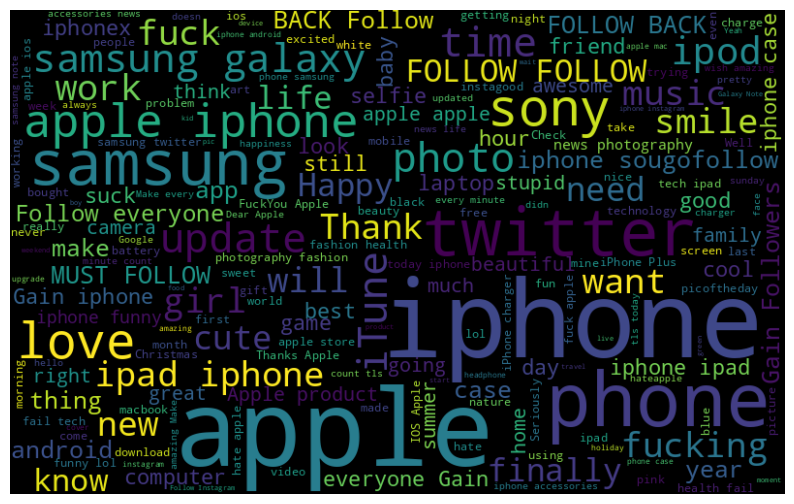

In [18]:
# all training words desplay in word cloud

all_words = ' '.join([text for text in train['re_preprocessed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

negative sentiments words, word cloud demo


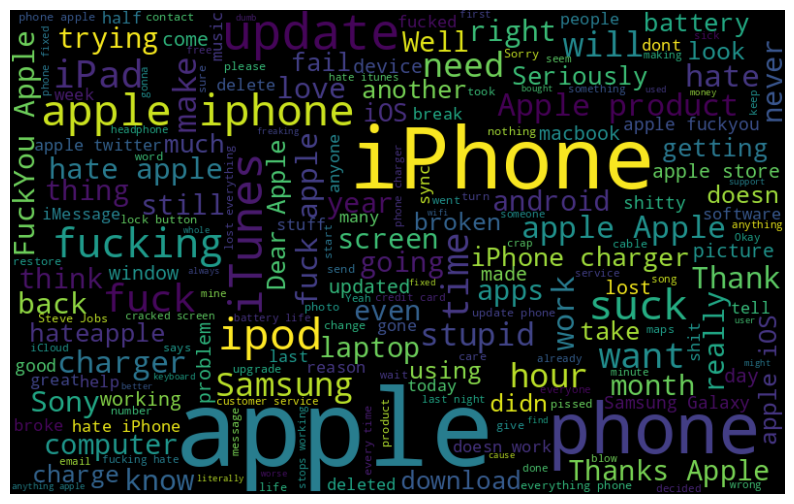

positive sentiments words in word cloud demo


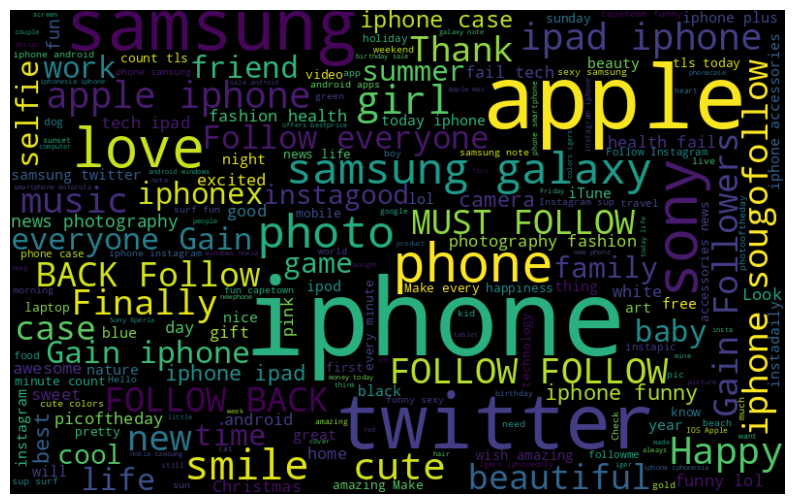

In [19]:
#desplay negative words and positive words in word cloud
print('negative sentiments words, word cloud demo')

negative_words = ' '.join([text for text in train['re_preprocessed'][train['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



print('positive sentiments words in word cloud demo')

positive_words = ' '.join([text for text in train['re_preprocessed'][train['label'] == 0]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## hash tag extracting

In [20]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags


In [21]:
# extracting hashtags from negative sentimens training case

HT_positive_senti = hashtag_extract(train['re_preprocessed'][train['label'] == 0])

# extracting hashtags from negative sentiments training case
HT_negative_senti = hashtag_extract(train['re_preprocessed'][train['label'] == 1])

# unnesting list
HT_positive = sum(HT_positive_senti,[])
HT_negative = sum(HT_negative_senti,[])


In [22]:
import re

def extract_hashtags(s):
    return re.findall(r'\#\w+', s)

train['hashtags'] = train['re_preprocessed'].apply(extract_hashtags)
test['hashtags'] = test['re_preprocessed'].apply(extract_hashtags)
train

,label,tweet,re_preprocessed,hashtags
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #b...,"[#fingerprint, #Pregnancy, #android, #apps, #b..."
1,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...,"[#yay, #Sony, #Xperia, #sonyexperias]"
2,0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...,"[#talk, #makememories, #unplug, #relax, #iphon..."
3,0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...,"[#iphone, #cute, #daventry, #home]"
4,1,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...,[]
...,...,...,...,...
11783,1,lost all my contacts again... please text me w...,lost contacts again please text with your name...,[#angry]
11784,1,This is my 4th iPhone charger and it's already...,This iPhone charger already breaking apple,[]
11785,1,"Oh, that silly Hitler.... #hateapple RT @DonSt...",that silly Hitler #hateapple Hitler responds #...,"[#hateapple, #iPad]"
11786,1,just bought a Huawei Ascend G300 and it has my...,just bought Huawei Ascend data transferred the...,[]


In [23]:
len(HT_negative),len(HT_positive)

(10230, 41061)

## hash tags positive and negative

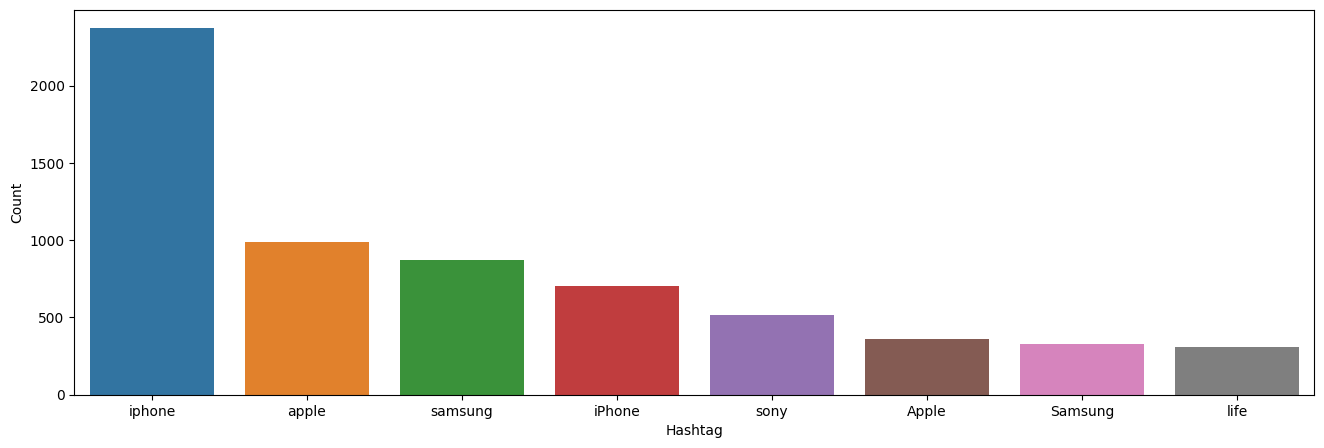

In [24]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 8)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


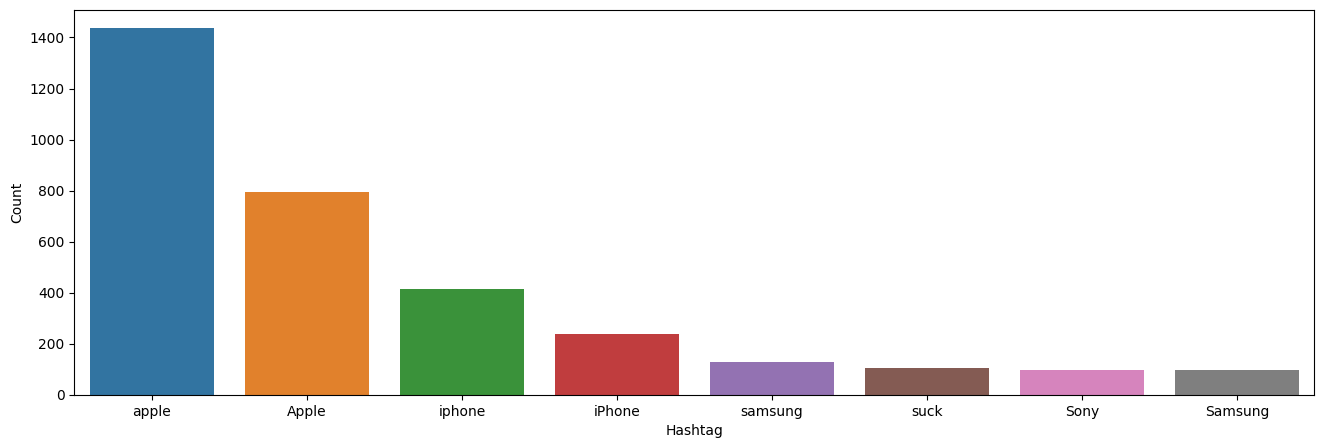

In [25]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 8)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


## extract organization related to text

In [26]:
#NER extraction
import spacy
nlp = spacy.load("en_core_web_sm")
#to extract entity =organization extract as a feature
def findEntRelated(text:str,entlab='ORG'):#defau set org
  doc = nlp(text)
  #list for storing the company names
  all_company_names = []
  all_company_names_as_list=[]

  for ent in doc.ents:
    if entlab==ent.label_:
      all_company_names.append(ent)
  for a in all_company_names:
    for b in a:

        all_company_names_as_list.append(str(b))

  return list(set(all_company_names_as_list))

train['organization_related_to_text'] = train['re_preprocessed'].apply(findEntRelated)
test['organization_related_to_text'] = test['re_preprocessed'].apply(findEntRelated)

In [27]:
train.head()

,label,tweet,re_preprocessed,hashtags,organization_related_to_text
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #b...,"[#fingerprint, #Pregnancy, #android, #apps, #b...","[Pregnancy, Test]"
1,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...,"[#yay, #Sony, #Xperia, #sonyexperias]",[Sony]
2,0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...,"[#talk, #makememories, #unplug, #relax, #iphon...",[]
3,0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...,"[#iphone, #cute, #daventry, #home]",[]
4,1,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...,[],[Apple]


In [28]:
train["organization_related_to_text"]

0        [Pregnancy, Test]
1                   [Sony]
2                       []
3                       []
4                  [Apple]
               ...        
11783                   []
11784                   []
11785               [iPad]
11786             [Huawei]
11787                   []
Name: organization_related_to_text, Length: 11788, dtype: object

In [29]:
label_counts = train['organization_related_to_text'].value_counts()

# Print the label counts
print("Label Counts:")
print(label_counts[1:30])

Label Counts:
[Apple]               684
[sony]                306
[apple]               181
[samsung]             171
[Sony]                151
[iPhone]              125
[iPad]                115
[Samsung]             114
[iPod]                 79
[iTunes]               68
[Apple, iPhone]        35
[APPLE]                30
[iPad, Apple]          27
[iPhones]              24
[ILCE, sony]           23
[Apple, #]             22
[Android]              22
[#, apple]             21
[iPhone, Straps]       19
[Apple, apple]         19
[Samsung, Apple]       18
[Sony, sony]           17
[#, iPhone]            16
[#, white]             12
[Samsung, samsung]     11
[SONY]                 11
[Apple, iPod]          11
[Nokia]                11
[Motorola]             11
Name: organization_related_to_text, dtype: int64


In [30]:
# #remove doesnt match words with gensim doesnotmatch function
# import gensim.downloader as api
# # This is a huge model (~1.6 gb) and it will take some time to load

# wv_social = api.load('glove-twitter-100')#twitter trained data to check similarity
# wv_wiki=api.load('word2vec-google-news-300')# wiki trained data for check similarity

In [31]:
# #before apply to all train and test data srames
# wv_social.doesnt_match(["facebook", "#", "google", "microsoft"]),wv_wiki.doesnt_match(["facebook", "#", "google", "microsoft"])


## train and test data

In [32]:
train

,label,tweet,re_preprocessed,hashtags,organization_related_to_text
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #b...,"[#fingerprint, #Pregnancy, #android, #apps, #b...","[Pregnancy, Test]"
1,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...,"[#yay, #Sony, #Xperia, #sonyexperias]",[Sony]
2,0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...,"[#talk, #makememories, #unplug, #relax, #iphon...",[]
3,0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...,"[#iphone, #cute, #daventry, #home]",[]
4,1,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...,[],[Apple]
...,...,...,...,...,...
11783,1,lost all my contacts again... please text me w...,lost contacts again please text with your name...,[#angry],[]
11784,1,This is my 4th iPhone charger and it's already...,This iPhone charger already breaking apple,[],[]
11785,1,"Oh, that silly Hitler.... #hateapple RT @DonSt...",that silly Hitler #hateapple Hitler responds #...,"[#hateapple, #iPad]",[iPad]
11786,1,just bought a Huawei Ascend G300 and it has my...,just bought Huawei Ascend data transferred the...,[],[Huawei]


In [33]:
test

,id,tweet,re_preprocessed,hashtags,organization_related_to_text
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate #iphone upgrade download apps #ugh #apple...,"[#iphone, #ugh, #apple]",[]
1,7922,currently shitting my fucking pants. #apple #i...,currently shitting fucking pants #apple #iMac ...,"[#apple, #iMac, #cashmoney, #raddest, #swagswa...",[]
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",like puts some ROMS iPad that possible wouldn ...,[],[iPad]
3,7924,My ipod is officially dead. I lost all my pict...,ipod officially dead lost pictures videos from...,"[#hatinglife, #sobbing]",[]
4,7925,Been fighting iTunes all night! I only want th...,Been fighting iTunes night only want music paid,[],[]
...,...,...,...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",#SamsungGalaxyNote Explodes Burns Year Thanks ...,"[#SamsungGalaxyNote, #Samsung]",[Samsung]
1949,9870,Now Available - Hoodie. Check it out here - ht...,Available Hoodie Check here #iPhone #case #mus...,"[#iPhone, #case, #music, #discount]","[Check, Hoodie]"
1950,9871,There goes a crack right across the screen. If...,There goes crack right across screen could act...,"[#Apple, #Iphone]",[]
1951,9872,@codeofinterest as i said #Adobe big time we m...,said #Adobe time well include #apple,"[#Adobe, #apple]",[]


## train test split data

In [34]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#remove non word charactors
train['re_preprocessed'] = train['re_preprocessed'].str.replace("[^a-zA-Z]", " ")
#replace two space or more to one space
train['re_preprocessed'] = train['re_preprocessed'].str.replace(" +", " ")
#remove non word charactors
test['re_preprocessed'] = test['re_preprocessed'].str.replace("[^a-zA-Z]", " ")
#replace two space or more to one space
test['re_preprocessed'] = test['re_preprocessed'].str.replace(" +", " ")

# Assume X is your feature set and y is your target variable 'label'


# rus = RandomUnderSampler(random_state=42)
# X, y = rus.fit_resample(train['re_preprocessed'], train['label'])

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

<ipython-input-34-a14265f1ffd5>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  train['re_preprocessed'] = train['re_preprocessed'].str.replace("[^a-zA-Z]", " ")
<ipython-input-34-a14265f1ffd5>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  train['re_preprocessed'] = train['re_preprocessed'].str.replace(" +", " ")
<ipython-input-34-a14265f1ffd5>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  test['re_preprocessed'] = test['re_preprocessed'].str.replace("[^a-zA-Z]", " ")
<ipython-input-34-a14265f1ffd5>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  test['re_preprocessed'] = test['re_preprocessed'].str.replace(" +", " ")


In [35]:
X_train.shape, X_test.shape


((8841, 1), (2947, 1))

## model building

In [36]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [37]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [38]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers

l = tf.keras.layers.Dropout(0.01, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [39]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [41]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
 51/277 [====>.........................] - ETA: 53:42 - loss: 0.6125 - accuracy: 0.6716 - precision: 0.7023 - recall: 0.5460

KeyboardInterrupt: ignored

## model evaluation

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
import numpy as np
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
model.save('/content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify the Sentiments/model.h5', save_format='h5')

In [ ]:
import tensorflow_hub as hub
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify the Sentiments/model.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
reviews = [
    'this is a bad product',
    'best product',
    'nice',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "best product apple "
]
model.predict(reviews)

## fast text model

## fasttext model

### download and configurations

In [ ]:
# !wget -P /content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify\ the\ Sentiments https://github.com/facebookresearch/fastText/archive/v0.9.2.zip

In [ ]:
# !unzip /content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify\ the\ Sentiments/v0.9.2.zip -d /content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify\ the\ Sentiments


In [ ]:
# !pip install -e /content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify\ the\ Sentiments/fastText-0.9.2/

### text processing for the case

In [ ]:
ft_train

In [ ]:

!pip install fasttext


In [ ]:
import fasttext
ft_train=train
ft_test=test

In [ ]:
ft_train.label.unique()

In [ ]:
# process data for fasttext supervised learning format

ft_train['label'] = '__label__' + ft_train['label'].astype(str)
ft_train.head(5)

In [ ]:
ft_train['ft_trainingprocessed'] = ft_train['label'] + ' ' + ft_train['tweet']
ft_train.head(3)

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)

    return text.strip().lower()

ft_train['ft_trainingprocessed'] = ft_train['ft_trainingprocessed'].map(preprocess)
ft_train.head()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ft_train, test_size=0.2)
train.shape, test.shape

In [ ]:
train.to_csv("sentiment.train", columns=["ft_trainingprocessed"], index=False, header=False)
test.to_csv("sentiment.test", columns=["ft_trainingprocessed"], index=False, header=False)

In [ ]:
model = fasttext.train_supervised(input="sentiment.train")
model.test("sentiment.test")

In [ ]:
model.predict("what amazing service apple won't even talk to me about a question i have unless i pay them for their stupid support")